# Radial null geodesics in Schwarzschild spacetime

This Jupyter/SageMath worksheet is relative to the lectures
[Geometry and physics of black holes](http://luth.obspm.fr/~luthier/gourgoulhon/bh16/)

These computations are based on [SageManifolds](http://sagemanifolds.obspm.fr) (version 1.0, as included in SageMath 7.5 and higher versions)

Click [here](https://raw.githubusercontent.com/egourgoulhon/BHLectures/master/sage/Schwarz_radial_null_geod.ipynb) to download the worksheet file (ipynb format). To run it, you must start SageMath with the Jupyter notebook, with the command `sage -n jupyter`

*NB:* a version of SageMath at least equal to 7.5 is required to run this worksheet: 

In [1]:
version()

'SageMath version 9.2.beta12, Release Date: 2020-09-06'

First we set up the notebook to display mathematical objects using LaTeX formatting:

In [2]:
%display latex

## Spacetime

We declare the spacetime manifold $M$:

In [3]:
M = Manifold(4, 'M')
print(M)

4-dimensional differentiable manifold M


The Schwarzschild-Droste coordinates $(t,r,\theta,\phi)$:

In [4]:
X.<t,r,th,ph> = M.chart(r't r:(0,+oo) th:(0,pi):\theta ph:(0,2*pi):\phi')
X

Chart (M, (t, r, th, ph))

The Schwarzschild metric:

In [5]:
g = M.lorentzian_metric('g')
m = var('m') ; assume(m>=0)
g[0,0], g[1,1] = -(1-2*m/r), 1/(1-2*m/r)
g[2,2], g[3,3] = r^2, (r*sin(th))^2 
g.display()

g = (2*m/r - 1) dt*dt - 1/(2*m/r - 1) dr*dr + r^2 dth*dth + r^2*sin(th)^2 dph*dph

## Radial null geodesics

The outgoing family:

In [6]:
var('u')
outgeod = M.curve({X: [r + 2*m*ln(abs(r/(2*m)-1)) + u, r, pi/2, pi]}, (r, 0, +Infinity))
outgeod.display()

(0, +Infinity) --> M
   r |--> (t, r, th, ph) = (2*m*log(abs(1/2*r/m - 1)) + r + u, r, 1/2*pi, pi)

The ingoing family:

In [7]:
var('v')
ingeod = M.curve({X: [-r - 2*m*ln(abs(r/(2*m)-1)) + v, r, pi/2, pi]}, (r, 0, +Infinity))
ingeod.display()

(0, +Infinity) --> M
   r |--> (t, r, th, ph) = (-2*m*log(abs(1/2*r/m - 1)) - r + v, r, 1/2*pi, pi)

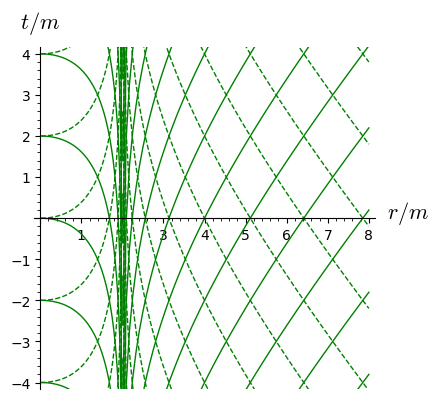

In [8]:
graph = Graphics()
for u0 in range(-20, 20, 2):
    graph += outgeod.plot(ambient_coords=(r,t), prange=(0.01, 1.99), parameters={m: 1, u: u0}, 
                          color='green', style='-', thickness=1, label_axes=False)
    graph += outgeod.plot(ambient_coords=(r,t), prange=(2.01, 8), parameters={m: 1, u: u0}, 
                          color='green', style='-', thickness=1, label_axes=False)
    graph += ingeod.plot(ambient_coords=(r,t), prange=(0.01, 1.99), parameters={m: 1, v: u0}, 
                          color='green', style='--', thickness=1, label_axes=False)
    graph += ingeod.plot(ambient_coords=(r,t), prange=(2.01, 8), parameters={m: 1, v: u0}, 
                          color='green', style='--', thickness=1, label_axes=False)
show(graph, axes_labels=[r"$r/m$", r"$t/m$"], aspect_ratio=1, ymin=-4, ymax=4)

Plot of some light cones:

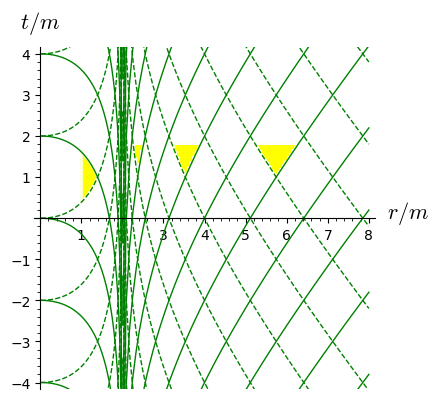

In [9]:
fout(r,u) = r + 2*ln(abs(r/2-1) + 1e-10) + u
fin(r,v) = -r - 2*ln(abs(r/2-1) + 1e-10) + v

def cone1(r,t):
    return t<fout(r,2) and t>fin(r,0) and r>1
def cone2(r,t):
    return t>fout(r,2) and t>fin(r,0) and t<1.8
def cone3(r,t):
    return t>fout(r,-2) and t>fin(r,4) and t<1.8
def cone4(r,t):
    return t>fout(r,-6) and t>fin(r,8) and t<1.8

graph += region_plot(cone1, (1,2), (0,2), incol='yellow')
graph += region_plot(cone2, (2,8), (0,2), incol='yellow')
graph += region_plot(cone3, (2,8), (0,2), incol='yellow')
graph += region_plot(cone4, (2,8), (0,2), incol='yellow')

show(graph, axes_labels=[r"$r/m$", r"$t/m$"], aspect_ratio=1, ymin=-4, ymax=4)

In [10]:
graph.save("sch_rad_null_geod.pdf", aspect_ratio=1, ymin=-4, ymax=4)

## Eddington-Finkelstein coordinates

The ingoing Eddington-Finkelstein chart:

In [11]:
X_EF.<te,r,th,ph> = M.chart(r'te:\tilde{t} r:(0,+oo) th:(0,pi):\theta ph:(0,2*pi):\phi') 
X_EF

Chart (M, (te, r, th, ph))

In [12]:
X_to_X_EF = X.transition_map(X_EF, [t+2*m*ln(abs(r/(2*m)-1)), r, th, ph])
X_to_X_EF.display()

te = 2*m*log(abs(1/2*r/m - 1)) + t
r = r
th = th
ph = ph

In [13]:
X_to_X_EF.inverse().display()

t = 2*m*log(2) + 2*m*log(m) - 2*m*log(abs(-2*m + r)) + te
r = r
th = th
ph = ph

In [14]:
ingeod.display()

(0, +Infinity) --> M
   r |--> (t, r, th, ph) = (-2*m*log(abs(1/2*r/m - 1)) - r + v, r, 1/2*pi, pi)
   r |--> (te, r, th, ph) = (-r + v, r, 1/2*pi, pi)

In [15]:
outgeod.display()

(0, +Infinity) --> M
   r |--> (t, r, th, ph) = (2*m*log(abs(1/2*r/m - 1)) + r + u, r, 1/2*pi, pi)
   r |--> (te, r, th, ph) = (-4*m*log(2) - 4*m*log(m) + 4*m*log(abs(-2*m + r)) + r + u, r, 1/2*pi, pi)

Plot of the radial null geodesics in terms of the ingoing Eddington-Finkelstein coordinates:

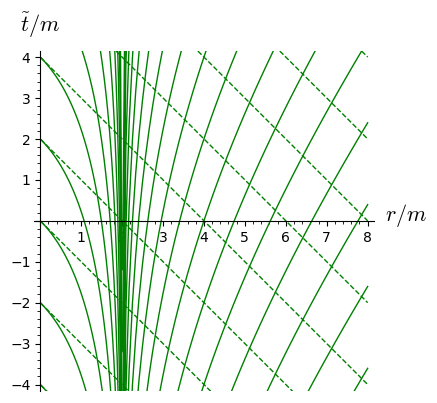

In [16]:
graph = Graphics()
for u0 in range(-20, 20, 2):
    graph += outgeod.plot(chart=X_EF, ambient_coords=(r,te), prange=(0.01, 1.99), 
                          parameters={m: 1, u: u0}, color='green', style='-', 
                          thickness=1, label_axes=False)
    graph += outgeod.plot(chart=X_EF, ambient_coords=(r,te), prange=(2.01, 8), 
                          parameters={m: 1, u: u0}, color='green', style='-', 
                          thickness=1, label_axes=False)
    graph += ingeod.plot(chart=X_EF, ambient_coords=(r,te), prange=(0.01, 8), 
                         parameters={m: 1, v: u0}, color='green', style='--', 
                         thickness=1, label_axes=False)
show(graph, axes_labels=[r"$r/m$", r"$\tilde{t}/m$"], aspect_ratio=1, ymin=-4, ymax=4)

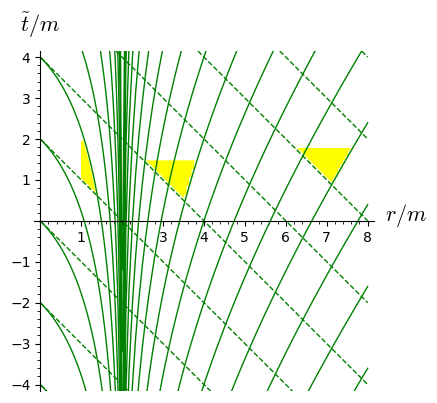

In [17]:
fout(r,u) = r + 4*ln(abs(r/2-1) + 1e-10) + u
fin(r,v) = -r + v

def cone1(r,t):
    return t<fout(r,4) and t>fin(r,2) and t<2
def cone2(r,t):
    return t>fout(r,2) and t>fin(r,0) and t<1.8
def cone3(r,t):
    return t>fout(r,-2) and t>fin(r,4) and t<1.5
def cone4(r,t):
    return t>fout(r,-10) and t>fin(r,8) and t<1.8

graph += region_plot(cone1, (1,2), (0,2), incol='yellow')
#graph += region_plot(cone2, (2,8), (0,2), incol='yellow')
graph += region_plot(cone3, (2,8), (0,2), incol='yellow')
graph += region_plot(cone4, (2,8), (0,2), incol='yellow')

show(graph, axes_labels=[r"$r/m$", r"$\tilde{t}/m$"], aspect_ratio=1, ymin=-4, ymax=4)

In [18]:
graph.save("sch_rad_null_geod_EF.pdf", aspect_ratio=1, ymin=-4, ymax=4)

Plot of the hypersurfaces $t=\mathrm{const}$ in terms of the ingoing Eddington-Finkelstein coordinates:

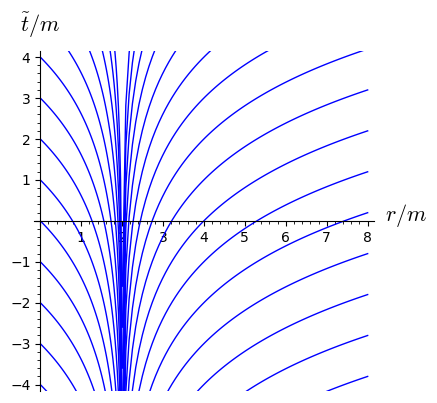

In [19]:
graph = Graphics()
for t0 in range(-8, 10):
    graph += X.plot(X_EF, ranges={r:(2.01,8)}, fixed_coords={t:t0,th:pi/2,ph:0}, 
                    ambient_coords=(r,te), style={t:'--', r:'-'}, parameters={m:1},
                    color='blue')
    graph += X.plot(X_EF, ranges={r:(0.01, 1.99)}, fixed_coords={t:t0,th:pi/2,ph:0}, 
                    ambient_coords=(r,te), style={t:'--', r:'-'}, parameters={m:1},
                    color='blue')
show(graph, axes_labels=[r"$r/m$", r"$\tilde{t}/m$"], aspect_ratio=1, ymin=-4, ymax=4)

In [20]:
graph.save("sch_SD_slices.pdf", axes_labels=[r"$r/m$", r"$\tilde{t}/m$"],
           aspect_ratio=1, ymin=-4, ymax=4)